# **TRABAJO PRACTICO 1er CUATRIMESTRE 2024 – cursos K3013 y K3052**

In [94]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

# Descripción de la Base de Datos mpg<br>
##### Esta base de datos contiene información sobre diversos aspectos de automóviles, especialmente centrada en la eficiencia del combustible medida en millas por galón (mpg).

### Columnas Principales

- **mpg**: Millas por galón, una medida de eficiencia del combustible.<br>

- **cylinders**: Número de cilindros en el motor.<br>

- **displacement**: Desplazamiento del motor (en pulgadas cúbicas).<br>

- **horsepower**: Potencia del motor (en caballos de fuerza).<br>

- **weight**: Peso del vehículo (en libras).<br>

- **acceleration**: Tiempo que tarda en acelerar de 0 a 60 mph (en segundos).<br>

- **model_year**: Año del modelo del automóvil.<br>

- **origin**: Origen del automóvil (1: América, 2: Europa, 3: Asia).<br>

- **name**: Nombre del modelo del automóvil.<br>

### Origen
- Los datos provienen del Centro de Investigación de Automóviles de la Universidad de California, Irvine (UCI) y se han utilizado en numerosos estudios y proyectos.

## Link: 
[Dataset Mpg](https://data.world/dataman-udit/cars-data)

# **Primera Parte: Análisis exploratorio de datos (EDA)**

>* Damos una vista rápida de la base de datos para tener una idea de los tipos de valores que son utilizados en cada columna.*

In [95]:
mpg_df = sns.load_dataset('mpg')
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


>*Realizamos un resumen de valores que nos seran de utilidad. Ej:cantidad de datos por columna(count), el promedio de cada columna (mean), el numero max y min de cada columna.*

In [96]:
mpg_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


>Podemos ver que la cantidad de valores que tiene la columna "horsepower" en la fila "count" es inferior al resto. Esto quiere decir que hay valores NaN cargados en dichas columnas "faltantes". El resumen anterior no tiene en cuenta esos valores NaN para hacer calculos.<br> 

>Para solucionar el problema mencionado procedemos a descartar aquellas filas en las que tengan algun atributo NaN.<br>


In [97]:
mpg_df = mpg_df.dropna()
mpg_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


>*Si bien presentamos un buen resumen de la base de datos, lo hicimos para cada columna individualmente y lo que nos interesa es ver si hay algún tipo de relación entre cada una de ellas. Para eso mismo, lo mejor sería hacer un gráfico (X; Y).*

>Utilizamos la funcion "sns.pairplot" de la libreria seaborn que nos que permite visualizar relaciones en un conjunto de datos de varias variables mediante la creación de una cuadrícula de gráficos de dispersión (scatter plots) y distribuciones (histogramas o gráficos de densidad) para cada par de variables

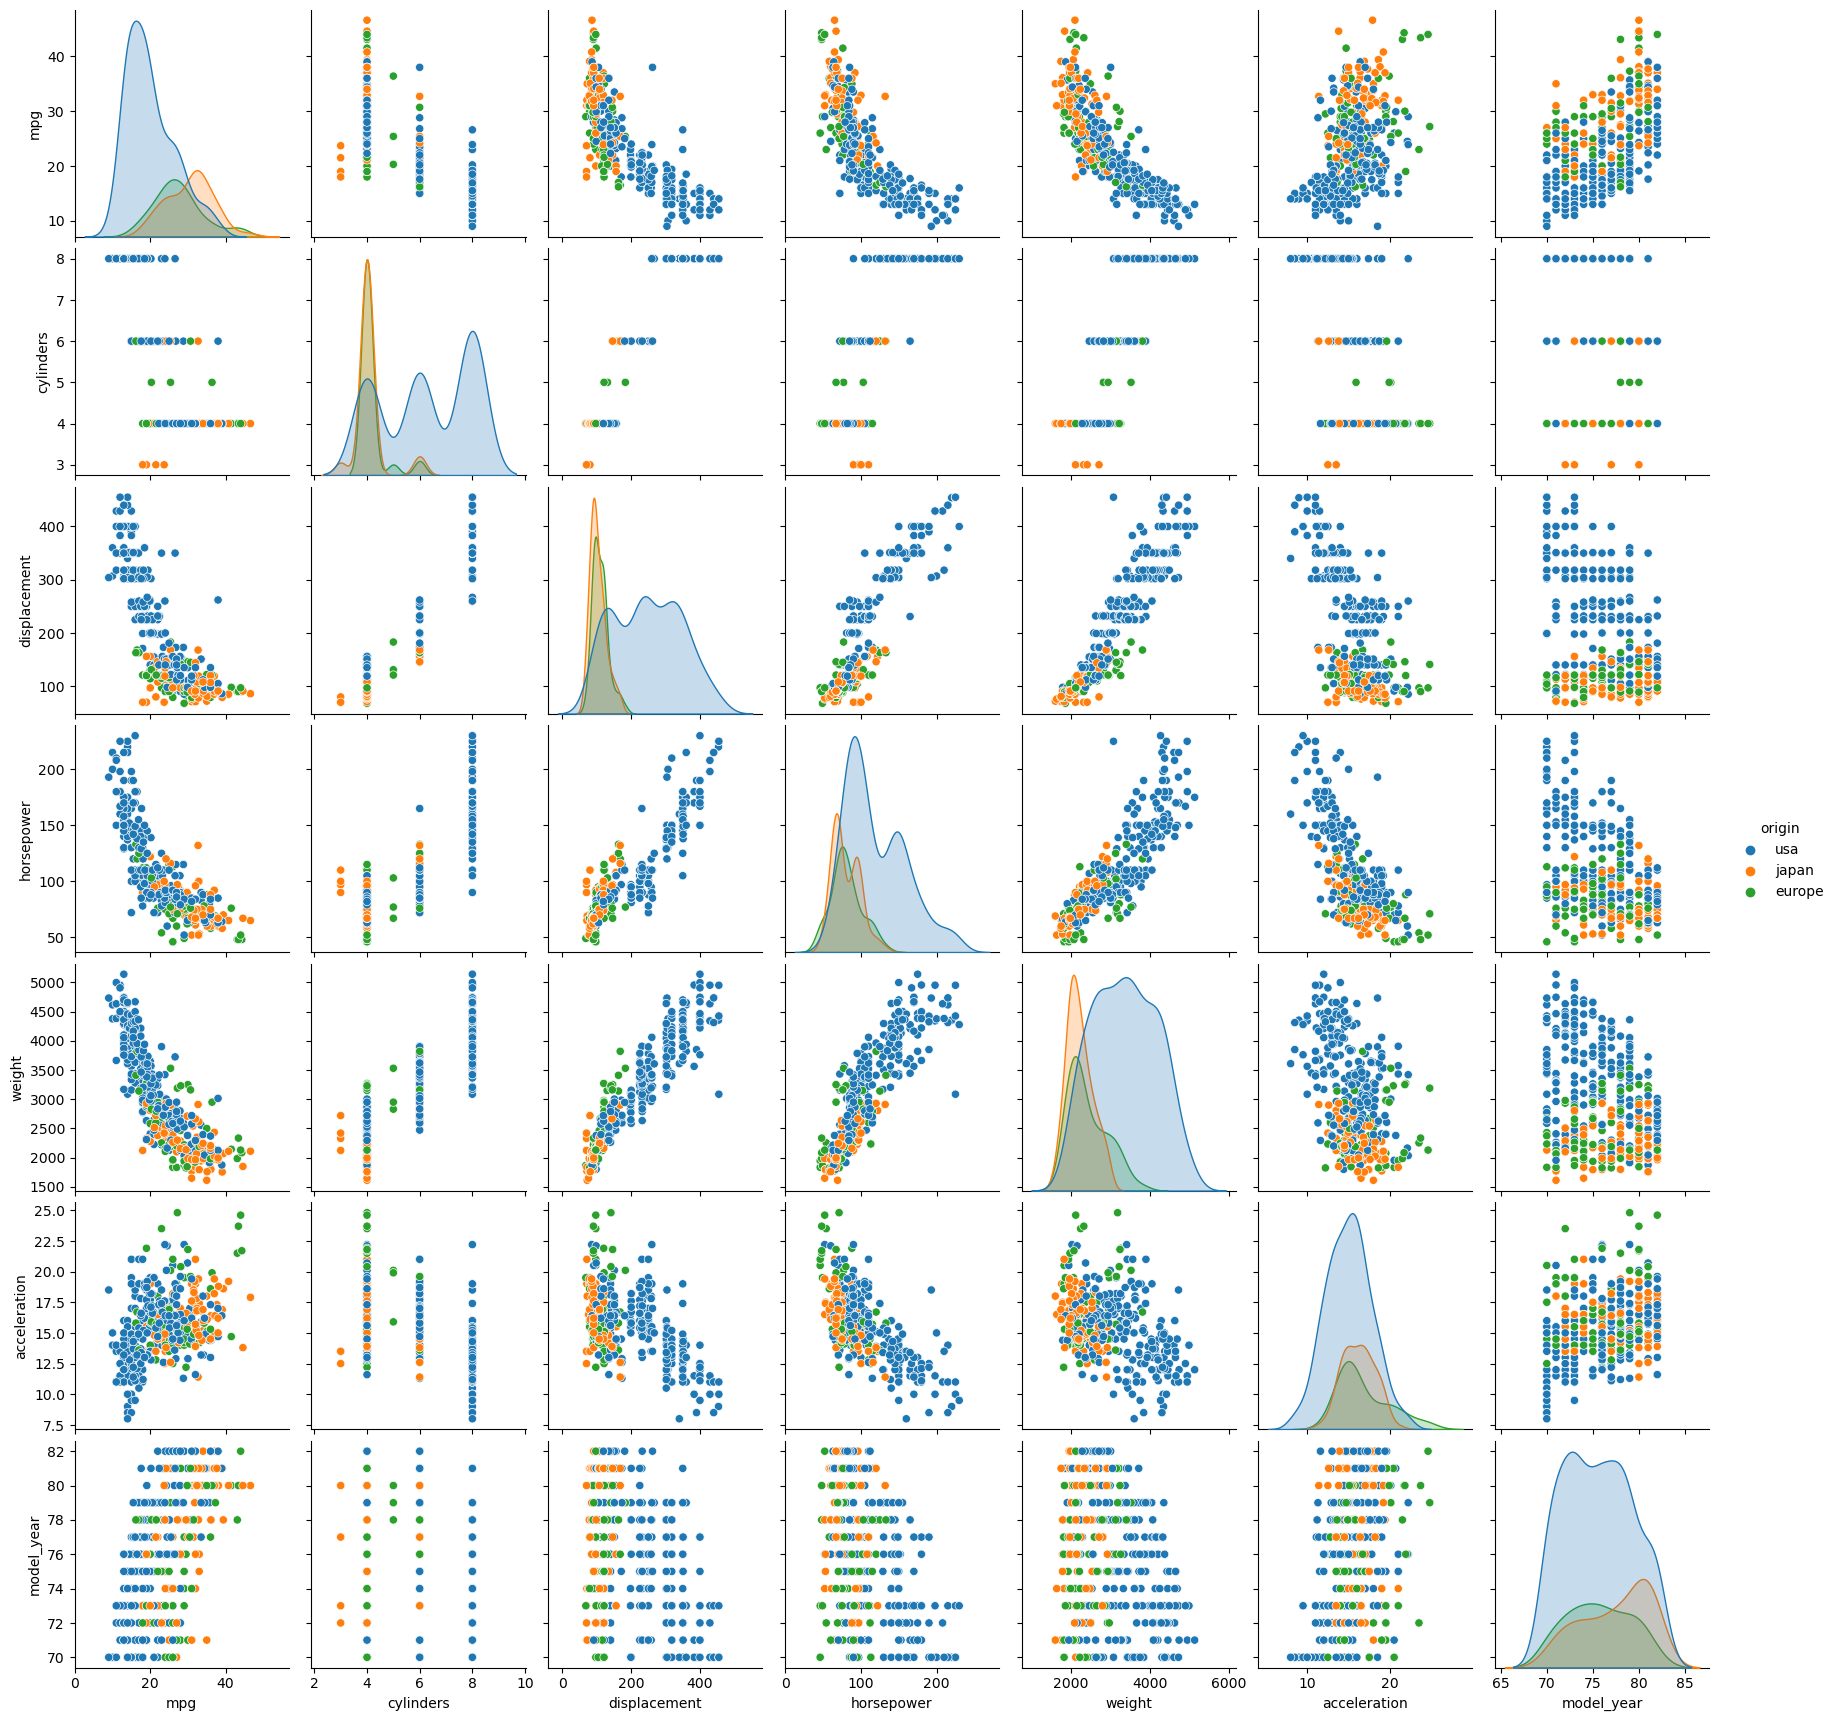

In [98]:
sns.pairplot(mpg_df,hue='origin')
plt.show()

>Viendo todos los gráficos, podemos notar que la relación del atributo 'mpg' con 'displacement', 'horsepower' o 'weight', sigue cierto patrón que nos puede ser de utilidad en el trabajo que estamos realizando.<br>

>Por cuestiones de entendimiento, nos quedaremos con las relaciones:<br>
- 'mpg' vs. 'horsepower' que vendría a ser la relación que hay entre la eficiencia del combustible y la cantidad de HP que entrega el motor.

- 'mpg' vs. 'weight' que vendría a ser la relación que hay entre la eficiencia del combustible y el peso del auto.

In [99]:
df_mpg = mpg_df[['mpg','weight','horsepower']]
df_mpg

,mpg,weight,horsepower
0,18.0,3504,130.0
1,15.0,3693,165.0
2,18.0,3436,150.0
3,16.0,3433,150.0
4,17.0,3449,140.0
...,...,...,...
393,27.0,2790,86.0
394,44.0,2130,52.0
395,32.0,2295,84.0
396,28.0,2625,79.0


>Una vez filtrada la base de datos, mostramos un resumen por columna y luego graficamos.

In [100]:
df_mpg.describe()

,mpg,weight,horsepower
count,392.000000,392.000000,392.000000
mean,23.445918,2977.584184,104.469388
std,7.805007,849.402560,38.491160
min,9.000000,1613.000000,46.000000
25%,17.000000,2225.250000,75.000000
50%,22.750000,2803.500000,93.500000
75%,29.000000,3614.750000,126.000000
max,46.600000,5140.000000,230.000000


>**Tenemos un total de 392 datos por columna.**

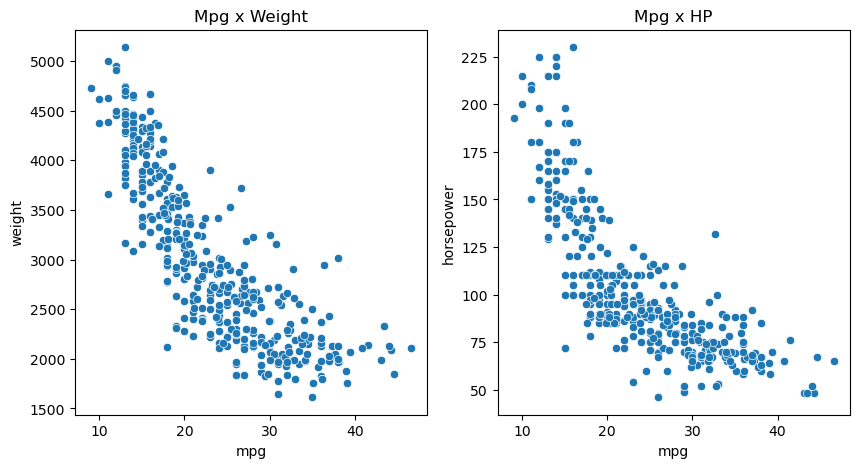

In [101]:
fig,axes = plt.subplots(1,2,figsize=(10,5))
sns.scatterplot(ax=axes[0],data=df_mpg,x='mpg',y='weight')
axes[0].set_title("Mpg x Weight")
sns.scatterplot(ax=axes[1],data=df_mpg,x='mpg',y='horsepower')
axes[1].set_title("Mpg x HP")
plt.show()

>*Viendo el gráfico, podemos notar que hay puntos que están alineados en vertical, lo que sugiere que hay más de un valor de Y (weight o horsepower) para un mismo valor de X (mpg).*

In [102]:
df_mpg['mpg'].value_counts()

mpg
13.0    20
14.0    19
18.0    17
15.0    16
26.0    14
        ..
31.9     1
16.9     1
18.2     1
22.3     1
44.0     1
Name: count, Length: 127, dtype: int64

>Confirmamos que, por ejemplo, mpg(x=13) tiene asociado 20 valores tanto de weight y horsepower.<br>

>Para solucionar este problema, optaremos por agrupar aquellas columnas tales que su valor en 'mpg' sea igual. Luego haremos el promedio tanto de la columna 'weight' y 'horsepower' por separado para dichos valores de 'mpg' y este promedio pasará a ser el nuevo y único valor del 'mpg' en cuestión. Veamos un ejemplo para entender mejor.

>Supongamos que tenemos los siguientes valores:

|X = mpg  |   2     |    2    |    2    |
|-------- |-------- |-------- |-------- | 
|     y   |     3   |   6     |    12   |

Vemos que para el valor x = 2 tenemos mas de un valor asociado. 

Tomamos todos valores asociados, realizamos el promedio y se lo asiganamos a x=2.<br>

- y_mean = $\frac{3+6+12}{3} = 7 $

<br>

|X = mpg  |   2     |
|-------- |-------- |
| y_mean  |     7   |

In [103]:
df_mpg = df_mpg.groupby(['mpg'],as_index=False).mean()
df_mpg.head()

,mpg,weight,horsepower
0,9.0,4732.00,193.00
1,10.0,4495.50,207.50
2,11.0,4419.00,187.00
3,12.0,4786.50,185.00
4,13.0,4254.45,158.35


In [104]:
df_mpg.describe()

,mpg,weight,horsepower
count,127.000000,127.000000,127.000000
mean,27.322047,2739.352415,93.182258
std,8.352976,716.279404,31.924081
min,9.000000,1755.000000,48.000000
25%,20.550000,2137.000000,70.062500
50%,27.200000,2615.000000,85.000000
75%,33.600000,3170.000000,107.250000
max,46.600000,4786.500000,207.500000


>*Vemos que una vez realizada nuestra operación, la cantidad de valores por columna pasó de 392 a 127,* ****MENOS DE LA MITAD!!****

>**Volvemos a graficar**

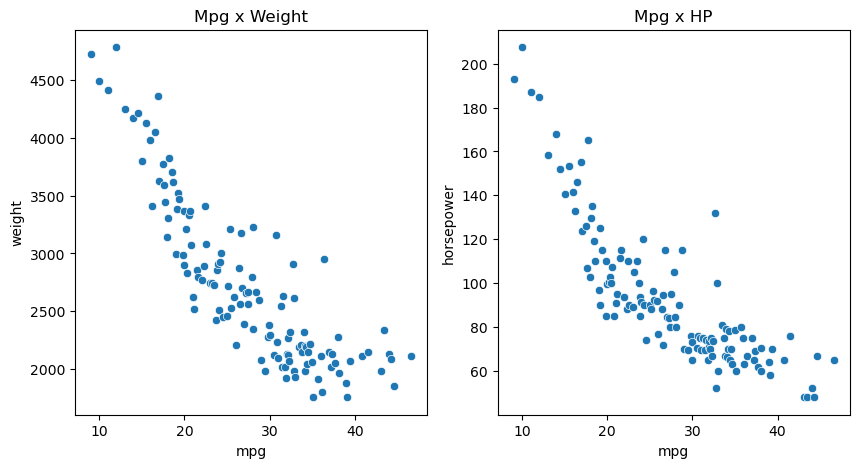

In [105]:
fig,axes = plt.subplots(1,2,figsize=(10,5))
sns.scatterplot(ax=axes[0],data=df_mpg,x='mpg',y='weight')
axes[0].set_title("Mpg x Weight")
sns.scatterplot(ax=axes[1],data=df_mpg,x='mpg',y='horsepower')
axes[1].set_title("Mpg x HP")
plt.show()

>Vemos como la cantidad de puntos se redujo notablemente.

>Con lo realizado, ya estamos listos para aplicar el método de aproximación por mínimos cuadrados.

# **Segunda Parte: Calculos** 
## Empezamos con la recta de Minimos cuadrados del tipo:  $Y = aX + b$

>Para lograr la recta de Minimos cuadrados debemos resolver el siguiente sistema de ecuaciones lineales llamadas ECUACIONES NORMALES. Se puede
resolver por cualquier método de resolución de sistemas de ecuaciones lineales. Una
vez hallados los valores de a y b, se tendrá la MEJOR recta de ajuste de los datos.

$$
\begin{cases}
a\sum_{}^{} x_i^2 + b\sum_{}^{} x_i = \sum_{}^{} f(x_i)x_i \\
a\sum_{}^{} x_i + bn = \sum_{}^{} f(x_i)
\end{cases}
$$
>Hacemos una copia de la base de dato que estuvimos trabajando y renombramos las columnas para que sea mas sencillo identificarlas.

In [106]:
df_mpg_lineal = df_mpg
df_mpg_lineal = df_mpg_lineal.rename(columns={'mpg':'mpg=X','weight':'Y1(W)','horsepower':'Y2(HP)'})

Aclaración:
> Como vamos a realizar la aproximación lineal para dos conjuntos de datos distintos, debemos realizar estos cálculos dos veces. Lo único que comparten son los valores de 'x' que son los de 'mpg'.
>> Para eso separamos por Y1(W) que serian las imagenes de la relación mpg vs. weight y por otro lado Y2(HP) que son las imagenes de la relación mpg vs. horsepower

>Calculamos los valores de:<br>
$x_i^2$  **;** $f(x_i)*x_i$
<br>Y los asiganamos a una nueva columna que la llamaremos por su respectiva operación.

In [107]:
df_mpg_lineal.loc[:,'X2'] = np.power(df_mpg_lineal['mpg=X'],2)  #Calculo x^2 
df_mpg_lineal.loc[:,'X*Y1(W)'] = df_mpg_lineal['mpg=X']*df_mpg_lineal['Y1(W)'] #Calculo x*y(Weight)
df_mpg_lineal.loc[:,'X*Y2(HP)'] = df_mpg_lineal['mpg=X']*df_mpg_lineal['Y2(HP)'] #Calculo x*y(HorsePower)
df_mpg_lineal.head()

,mpg=X,Y1(W),Y2(HP),X2,X*Y1(W),X*Y2(HP)
0,9.0,4732.00,193.00,81.0,42588.00,1737.00
1,10.0,4495.50,207.50,100.0,44955.00,2075.00
2,11.0,4419.00,187.00,121.0,48609.00,2057.00
3,12.0,4786.50,185.00,144.0,57438.00,2220.00
4,13.0,4254.45,158.35,169.0,55307.85,2058.55


>Ahora calculamos:

$\sum_{}^{} x_i^2$  **;**  $\sum_{}^{} x_i$ **;** $\sum_{}^{} f(x_i)x_i$ **;** $\sum_{}^{} f(x_i)$

>Con estos datos ya podemos pasar a resolver nuestro sistema de ecuaciones.


In [108]:
suma_parametros = df_mpg_lineal.sum().astype('float').round(2)
suma_parametros

mpg=X          3469.90
Y1(W)        347897.76
Y2(HP)        11834.15
X2           103596.07
X*Y1(W)     8854536.66
X*Y2(HP)     295179.68
dtype: float64

>Para resolver un sistema de ecuaciones lineales en Python, puedes utilizar una función llamada numpy.linalg.solve que resuelve sistemas de ecuaciones lineales de la forma
$Ax=B$, donde $A$ es una matriz de coeficientes y $B$ es un vector de términos constantes.

$A = \begin{pmatrix} \sum_{}^{} x_i^2 & \sum_{}^{} x_i \\ \sum_{}^{} f(x_i)x_i & n \end{pmatrix}, B = \begin{pmatrix} \sum_{}^{} f(x_i)x_i \\ \sum_{}^{} f(x_i)\end{pmatrix}$


>Aclaración:
>> Recordar que n=127, para saber este dato de forma general simplemente debemos ver la longitud de la tabla. Esto ultimo lo hacemos con el metodo *df_mpg_lineal.shape[0]*

Aproximacion Lineal Weight:		Y = -74.02X + 4761.76
Aproximacion Lineal Horse Power:	Y = -3.2X + 180.68


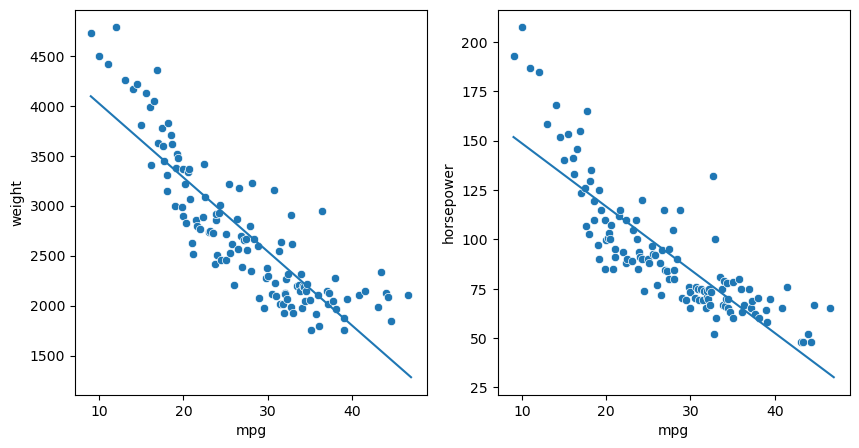

In [111]:
# Define the coefficients matrix A
A = np.array([[suma_parametros['X2'],suma_parametros['mpg=X']],
             [suma_parametros['mpg=X'],df_mpg_lineal.shape[0]]])

# Define the coefficients matrix B1, Weight
B1 = np.array([suma_parametros['X*Y1(W)'],
              suma_parametros['Y1(W)']])
solve1 = np.linalg.solve(A,B1) # Obtenemos a y b de Weight

# Define the coefficients matrix B1, Weight
B2 = np.array([suma_parametros['X*Y2(HP)'],
              suma_parametros['Y2(HP)']])
solve2 = np.linalg.solve(A,B2) # Obtenemos a y b de HorsePower

x1 = np.arange(df_mpg_lineal['mpg=X'].min(),df_mpg_lineal['mpg=X'].max()+1,1)
y1 = solve1[0]*x1 + solve1[1]

x2 = np.arange(df_mpg_lineal['mpg=X'].min(),df_mpg_lineal['mpg=X'].max()+1,1)
y2 = solve2[0]*x2 + solve2[1]

print(f"Aproximacion Lineal Weight:\t\tY = {solve1[0].round(2)}X + {solve1[1].round(2)}")
print(f"Aproximacion Lineal Horse Power:\tY = {solve2[0].round(2)}X + {solve2[1].round(2)}")


fig,axes = plt.subplots(1,2,figsize=(20,10))
sns.scatterplot(ax=axes[0],data=df_mpg,x='mpg',y='weight')
sns.lineplot(ax=axes[0],x=x1,y=y1)
sns.scatterplot(ax=axes[1],data=df_mpg,x='mpg',y='horsepower')
sns.lineplot(ax=axes[1],x=x2,y=y2)
plt.show()

In [112]:
df_mpg_lineal.loc[:,'Y1_predict'] = solve1[0]*df_mpg_lineal['mpg=X'] + solve1[1]
df_mpg_lineal.loc[:,'Y2_predict'] = solve2[0]*df_mpg_lineal['mpg=X'] + solve2[1]
df_mpg_lineal.head()

,mpg=X,Y1(W),Y2(HP),X2,X*Y1(W),X*Y2(HP),Y1_predict,Y2_predict
0,9.0,4732.00,193.00,81.0,42588.00,1737.00,4095.572213,151.857374
1,10.0,4495.50,207.50,100.0,44955.00,2075.00,4021.551022,148.654943
2,11.0,4419.00,187.00,121.0,48609.00,2057.00,3947.529830,145.452512
3,12.0,4786.50,185.00,144.0,57438.00,2220.00,3873.508638,142.250081
4,13.0,4254.45,158.35,169.0,55307.85,2058.55,3799.487446,139.047650


## Calculamos Error de la recta de Mínimos cuadrados

>La función de error será: $E(a,b)= \sum_{}^{} d_i^2 = \sum_{}^{} [(ax_i + b)- f(x_i)]^2 $

>Siendo 'Y1_predict' $= (ax_i + b)$ las nuevas imagenes de la relación 'mpg' vs. 'weight'

>Siendo 'Y2_predict' $= (ax_i + b)$ las nuevas imagenes de la relación 'mpg' vs. 'horsepower'

In [113]:
weight_error_lineal = np.power(df_mpg_lineal['Y1_predict']-df_mpg_lineal['Y1(W)'],2).sum()
horsepower_error_lineal = np.power(df_mpg_lineal['Y2_predict']-df_mpg_lineal['Y2(HP)'],2).sum()
print(f"Weight linear error:\t\t{weight_error_lineal.round(2)}")
print(f"Horse Power linear error:\t{horsepower_error_lineal.round(2)}")

Weight linear error:		16476367.35
Horse Power linear error:	38253.36


> Se realizará el mismo procedimiento para las siguientes aproximaciones.

# Empezamos con la hiperbola de Mínimos cuadrados del tipo: $ y = \frac{a}{x + b}$

>Nuestro objetivo en este momento es plantear las ecuaciones normales que nos permitirán encontrar la mejor hipérbola que se ajuste a los datos. El problema ahora es que es muy difícil encontrar una solución exacta. Por eso mismo es que vamos a buscar una función aproximante para poder resolver el problema en su forma lineal.

>Partiendo de la funcion:

 >Paso 1) $y = \frac{a}{x + b}$
 
 >Paso 2) $\frac{1}{y} = \frac{x+b}{a}$

 >Paso 3) $Y = AX+B$

 >Siendo:
>>$$ Y = \frac{1}{y} $$  
>>$$ A = \frac{1}{a} $$ 
>>$$ B=\frac{b}{a} $$ 
>>$$ X=x $$

>Ahora que ya tenemos nuestra aproximacion lineal pasamos a resolver las ecuaciones normales que usamos en la aproximacion lineal.
$$
\begin{cases}
a\sum_{}^{} x_i^2 + b\sum_{}^{} x_i = \sum_{}^{} f(x_i)x_i \\
a\sum_{}^{} x_i + bn = \sum_{}^{} f(x_i)
\end{cases}
$$

>Hacemos una copia de la base de dato que estuvimos trabajando y renombramos las columnas para que sea mas sencillo identificarlas.

In [114]:
df_mpg_hip = df_mpg # Hacemos copia para hacer aproximacion hiperbolica
df_mpg_hip = df_mpg_hip.rename(columns={'mpg':'mpg=X','weight':'y1(W)','horsepower':'y2(HP)'})
df_mpg_hip

,mpg=X,y1(W),y2(HP)
0,9.0,4732.00,193.00
1,10.0,4495.50,207.50
2,11.0,4419.00,187.00
3,12.0,4786.50,185.00
4,13.0,4254.45,158.35
...,...,...,...
122,43.4,2335.00,48.00
123,44.0,2130.00,52.00
124,44.3,2085.00,48.00
125,44.6,1850.00,67.00


>Calculamos los valores de:<br>

$$ Y = \frac{1}{y} $$


$$x_i^2$$ 

$$f(x_i)*x_i$$
>Asiganamos a una nueva columna los resultados de cada operación.

In [115]:
df_mpg_hip.loc[:,'Y1(W)'] = 1/df_mpg_hip['y1(W)']
df_mpg_hip.loc[:,'Y2(HP)'] = 1/df_mpg_hip['y2(HP)']
df_mpg_hip.loc[:,'X2'] = np.power(df_mpg_hip['mpg=X'],2)
df_mpg_hip.loc[:,'X*Y1(W)'] = df_mpg_hip['mpg=X'] * df_mpg_hip['Y1(W)']
df_mpg_hip.loc[:,'X*Y2(HP)'] = df_mpg_hip['mpg=X'] * df_mpg_hip['Y2(HP)']
df_mpg_hip.head()

,mpg=X,y1(W),y2(HP),Y1(W),Y2(HP),X2,X*Y1(W),X*Y2(HP)
0,9.0,4732.00,193.00,0.000211,0.005181,81.0,0.001902,0.046632
1,10.0,4495.50,207.50,0.000222,0.004819,100.0,0.002224,0.048193
2,11.0,4419.00,187.00,0.000226,0.005348,121.0,0.002489,0.058824
3,12.0,4786.50,185.00,0.000209,0.005405,144.0,0.002507,0.064865
4,13.0,4254.45,158.35,0.000235,0.006315,169.0,0.003056,0.082097


>Ahora calculamos:

$\sum_{}^{} x_i^2$  **;**  $\sum_{}^{} x_i$ **;** $\sum_{}^{} f(x_i)x_i$ **;** $\sum_{}^{} f(x_i)$

>Con estos datos ya podemos pasar a resolver nuestro sistema de ecuaciones.

In [116]:
suma_parametros_hip = df_mpg_hip.sum().astype('float').round(2)
suma_parametros_hip

mpg=X         3469.90
y1(W)       347897.76
y2(HP)       11834.15
Y1(W)            0.05
Y2(HP)           1.50
X2          103596.07
X*Y1(W)          1.43
X*Y2(HP)        44.13
dtype: float64

In [117]:
# Define the coefficients matrix A
A_hip = np.array([[suma_parametros_hip['X2'],suma_parametros_hip['mpg=X']],
             [suma_parametros_hip['mpg=X'],df_mpg_hip.shape[0]]])

# Define the coefficients matrix B1, Weight
B1_hip = np.array([suma_parametros_hip['X*Y1(W)'],
              suma_parametros_hip['Y1(W)']])
solve1_hip = np.linalg.solve(A_hip,B1_hip) # Obtenemos a y b de Weight

# Define the coefficients matrix B1, Weight
B2_hip = np.array([suma_parametros_hip['X*Y2(HP)'],
              suma_parametros_hip['Y2(HP)']])
solve2_hip = np.linalg.solve(A_hip,B2_hip) # Obtenemos a y b de HorsePower

print(f"Para la aproximacion 'mpg vs. weight':\t\tA1 = {solve1_hip[0]}\tB1 = {solve1_hip[1]}")
print(f"Para la aproximacion 'mpg vs. horsepower':\tA2 = {solve2_hip[0]}\tB2 = {solve2_hip[1]}")

solve1_hip[0] = 1/solve1_hip[0]
solve1_hip[1] = solve1_hip[1]*solve1_hip[0]

solve2_hip[0] = 1/solve2_hip[0]
solve2_hip[1] = solve2_hip[1]*solve2_hip[0]

print("\n\nAhora aplicamos las relaciones que obtuvimos de la función de aproximación.\n")
print(f"Para la aproximación 'mpg vs. weight':\t\ta1 = {solve1_hip[0].round(2)}\tb1 = {solve1_hip[1].round(2)}")
print(f"Para la aproximación 'mpg vs. horsepower':\ta2 = {solve2_hip[0].round(2)}\tb2 = {solve2_hip[1].round(2)}")

Para la aproximacion 'mpg vs. weight':		A1 = 7.2682823229784674e-06	B1 = 0.00019511643438974033
Para la aproximacion 'mpg vs. horsepower':	A2 = 0.0003579595456810333	B2 = 0.0020308360034754537


Ahora aplicamos las relaciones que obtuvimos de la función de aproximación.

Para la aproximación 'mpg vs. weight':		a1 = 137584.09	b1 = 26.84
Para la aproximación 'mpg vs. horsepower':	a2 = 2793.61	b2 = 5.67


>$$ A = \frac{1}{a} $$ 
>$$ B=\frac{b}{a} $$ 

Aproximacion Hiperbolica Weight:	y = 137584.09/ (x + 26.84)
Aproximacion Hiperbolica Horse Power:	y = 2793.61/ (x + 5.67)


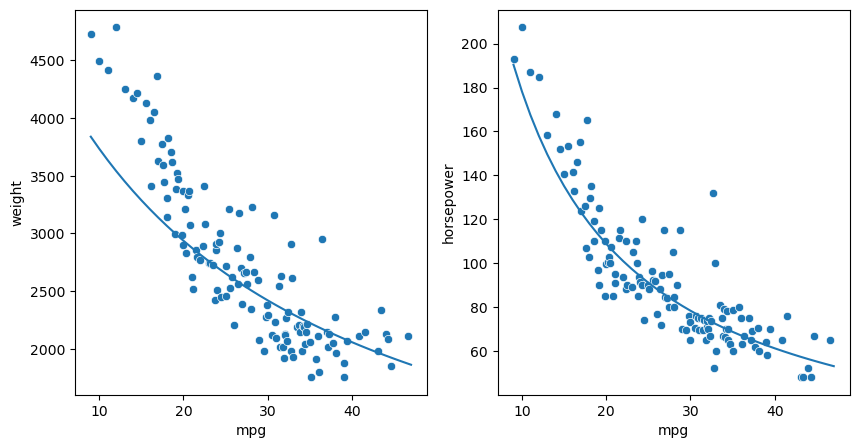

In [118]:
X1_hip = np.arange(df_mpg_hip['mpg=X'].min(),df_mpg_hip['mpg=X'].max()+1,1)
x1_hip = X1_hip
y1_hip = solve1_hip[0] / (x1_hip + solve1_hip[1])


X2_hip = np.arange(df_mpg_hip['mpg=X'].min(),df_mpg_hip['mpg=X'].max()+1,1)
Y2_hip = solve2_hip[0]*X2_hip + solve2_hip[1]
x2_hip = X2_hip
y2_hip = solve2_hip[0] / (x2_hip + solve2_hip[1])

print(f"Aproximacion Hiperbolica Weight:\ty = {solve1_hip[0].round(2)}/ (x + {solve1_hip[1].round(2)})")
print(f"Aproximacion Hiperbolica Horse Power:\ty = {solve2_hip[0].round(2)}/ (x + {solve2_hip[1].round(2)})")

fig,axes = plt.subplots(1,2,figsize=(20,10))
sns.scatterplot(ax=axes[0],data=df_mpg,x='mpg',y='weight')
sns.lineplot(ax=axes[0],x=x1_hip,y=y1_hip)
sns.scatterplot(ax=axes[1],data=df_mpg,x='mpg',y='horsepower')
sns.lineplot(ax=axes[1],x=x2_hip,y=y2_hip)
plt.show()

In [119]:
df_mpg_hip.loc[:,'y1_predict'] = solve1_hip[0] / (df_mpg_hip['mpg=X'] + solve1_hip[1])
df_mpg_hip.loc[:,'y2_predict'] = solve2_hip[0] / (df_mpg_hip['mpg=X'] + solve2_hip[1])
df_mpg_hip.head()

,mpg=X,y1(W),y2(HP),Y1(W),Y2(HP),X2,X*Y1(W),X*Y2(HP),y1_predict,y2_predict
0,9.0,4732.00,193.00,0.000211,0.005181,81.0,0.001902,0.046632,3838.315190,190.386549
1,10.0,4495.50,207.50,0.000222,0.004819,100.0,0.002224,0.048193,3734.140299,178.239411
2,11.0,4419.00,187.00,0.000226,0.005348,121.0,0.002489,0.058824,3635.470766,167.549344
3,12.0,4786.50,185.00,0.000209,0.005405,144.0,0.002507,0.064865,3541.881409,158.069015
4,13.0,4254.45,158.35,0.000235,0.006315,169.0,0.003056,0.082097,3452.989734,149.604071


## Calculamos Error de la hiperbola de Mínimos cuadrados

>La función de error será: $E(a,b)= \sum_{}^{} d_i^2 = \sum_{}^{} [(\frac{a}{x+b})- f(x_i)]^2 $

>Siendo 'Y1_predict' $= (\frac{a_1}{x+b_1})$ las nuevas imagenes de la relación 'mpg' vs. 'weight'

>Siendo 'Y2_predict' $= (\frac{a_2}{x+b_2})$ las nuevas imagenes de la relación 'mpg' vs. 'horsepower'

In [177]:
weight_error_hip = np.power(df_mpg_hip['y1_predict']-df_mpg_hip['y1(W)'],2).sum()
horsepower_error_hip = np.power(df_mpg_hip['y2(HP)']-df_mpg_hip['y2_predict'],2).sum()
print(f"Weight Hiperbolico error:\t{weight_error_hip.round(2)}")
print(f"Horse Power Hiperbolico error:\t{horsepower_error_hip.round(2)}")

Weight Hiperbolico error:	20605315.77
Horse Power Hiperbolico error:	23109.99


# Empezamos con la exponencial de Mínimos cuadrados del tipo: $ y = b*e^{(ax)}$

>Estamos ante el mismo problema que se nos planteó anteriormente. Por eso mismo es que vamos a buscar una función aproximante para poder resolver el problema en su forma lineal.

>Partiendo de la funcion:

 >Paso 1) $y = b*e^{(ax)}$
 
 >Paso 2) $ln(y) = ln(b*e^{(ax)})$

 >Paso 3) $ln(y) = ln(b) + ln(e^{(ax)})$

 >Paso 4) $ln(y) = ln(b) + axln(e)$

 >Paso 5) $ln(y) = ax + ln(b)$

 >Paso 6) $Y = AX + B$

 >Siendo:
>>$$ Y = ln(y) $$  
>>$$ A = a $$ 
>>$$ B=ln(b) $$ 
>>$$ X=x $$

>Ahora que ya tenemos nuestra aproximacion lineal pasamos a resolver las ecuaciones normales que usamos en la aproximacion lineal.
$$
\begin{cases}
a\sum_{}^{} x_i^2 + b\sum_{}^{} x_i = \sum_{}^{} f(x_i)x_i \\
a\sum_{}^{} x_i + bn = \sum_{}^{} f(x_i)
\end{cases}
$$

>Hacemos una copia de la base de dato que estuvimos trabajando y renombramos las columnas para que sea mas sencillo identificarlas.

In [121]:
df_mpg_exp = df_mpg # Hacemos copia para hacer aproximacion hiperbolica
df_mpg_exp = df_mpg_exp.rename(columns={'mpg':'mpg=X','weight':'y1(W)','horsepower':'y2(HP)'})
df_mpg_exp

,mpg=X,y1(W),y2(HP)
0,9.0,4732.00,193.00
1,10.0,4495.50,207.50
2,11.0,4419.00,187.00
3,12.0,4786.50,185.00
4,13.0,4254.45,158.35
...,...,...,...
122,43.4,2335.00,48.00
123,44.0,2130.00,52.00
124,44.3,2085.00,48.00
125,44.6,1850.00,67.00


>Calculamos los valores de:<br>

$$ Y = ln(y) $$

$$x_i^2$$ 

$$f(x_i)*x_i$$
>Asiganamos a una nueva columna los resultados de cada operación.

In [122]:
df_mpg_exp.loc[:,'Y1(W)'] = np.log(df_mpg_exp['y1(W)'])
df_mpg_exp.loc[:,'Y2(HP)'] = np.log(df_mpg_exp['y2(HP)'])
df_mpg_exp.loc[:,'X2'] = np.power(df_mpg_exp['mpg=X'],2)
df_mpg_exp.loc[:,'X*Y1(W)'] = df_mpg_exp['mpg=X'] * df_mpg_exp['Y1(W)']
df_mpg_exp.loc[:,'X*Y2(HP)'] = df_mpg_exp['mpg=X'] * df_mpg_exp['Y2(HP)']
df_mpg_exp.head()

,mpg=X,y1(W),y2(HP),Y1(W),Y2(HP),X2,X*Y1(W),X*Y2(HP)
0,9.0,4732.00,193.00,8.462103,5.262690,81.0,76.158929,47.364212
1,10.0,4495.50,207.50,8.410832,5.335131,100.0,84.108322,53.351313
2,11.0,4419.00,187.00,8.393669,5.231109,121.0,92.330356,57.542195
3,12.0,4786.50,185.00,8.473555,5.220356,144.0,101.682657,62.644270
4,13.0,4254.45,158.35,8.355721,5.064808,169.0,108.624370,65.842501


>Ahora calculamos:

$\sum_{}^{} x_i^2$  **;**  $\sum_{}^{} x_i$ **;** $\sum_{}^{} f(x_i)x_i$ **;** $\sum_{}^{} f(x_i)$

>Con estos datos ya podemos pasar a resolver nuestro sistema de ecuaciones.

In [123]:
suma_parametros_exp = df_mpg_exp.sum().astype('float').round(2)
suma_parametros_exp

mpg=X         3469.90
y1(W)       347897.76
y2(HP)       11834.15
Y1(W)         1001.29
Y2(HP)         569.48
X2          103596.07
X*Y1(W)      27130.06
X*Y2(HP)     15273.50
dtype: float64

In [128]:
# Define the coefficients matrix A
A_exp = np.array([[suma_parametros_exp['X2'],suma_parametros_exp['mpg=X']],
             [suma_parametros_exp['mpg=X'],df_mpg_exp.shape[0]]])

# Define the coefficients matrix B1, Weight
B1_exp = np.array([suma_parametros_exp['X*Y1(W)'],
              suma_parametros_exp['Y1(W)']])
solve1_exp = np.linalg.solve(A_exp,B1_exp) # Obtenemos a y b de Weight

# Define the coefficients matrix B1, Weight
B2_exp = np.array([suma_parametros_exp['X*Y2(HP)'],
              suma_parametros_exp['Y2(HP)']])
solve2_exp = np.linalg.solve(A_exp,B2_exp) # Obtenemos a y b de HorsePower

print(f"Para la aproximacion 'mpg vs. weight':\t\tA1 = {solve1_exp[0]}\tB1 = {solve1_exp[1]}")
print(f"Para la aproximacion 'mpg vs. horsepower':\tA2 = {solve2_exp[0]}\tB2 = {solve2_exp[1]}")

solve1_exp[1] = np.exp(solve1_exp[1])
solve2_exp[1] = np.exp(solve2_exp[1])

print("\n\nAhora aplicamos las relaciones que obtuvimos de la función de aproximación.\n")
print(f"Para la aproximación 'mpg vs. weight':\t\ta1 = {solve1_exp[0].round(6)}\tb1 = {solve1_exp[1].round(3)}")
print(f"Para la aproximación 'mpg vs. horsepower':\ta2 = {solve2_exp[0].round(6)}\tb2 = {solve2_exp[1].round(3)}")

Para la aproximacion 'mpg vs. weight':		A1 = -0.025847454849053753	B1 = 8.590378610871902
Para la aproximacion 'mpg vs. horsepower':	A2 = -0.032516183146312556	B2 = 5.372503180310157


Ahora aplicamos las relaciones que obtuvimos de la función de aproximación.

Para la aproximación 'mpg vs. weight':		a1 = -0.025847	b1 = 5379.65
Para la aproximación 'mpg vs. horsepower':	a2 = -0.032516	b2 = 215.401


>$$ A = a $$ 
>$$ B=ln(b) $$ 

Aproximacion Exponencial Weight:	y = 5379.65*exp^(-0.025847X)
Aproximacion Exponencial Horse Power:	y = 215.401*exp^(-0.032516X)


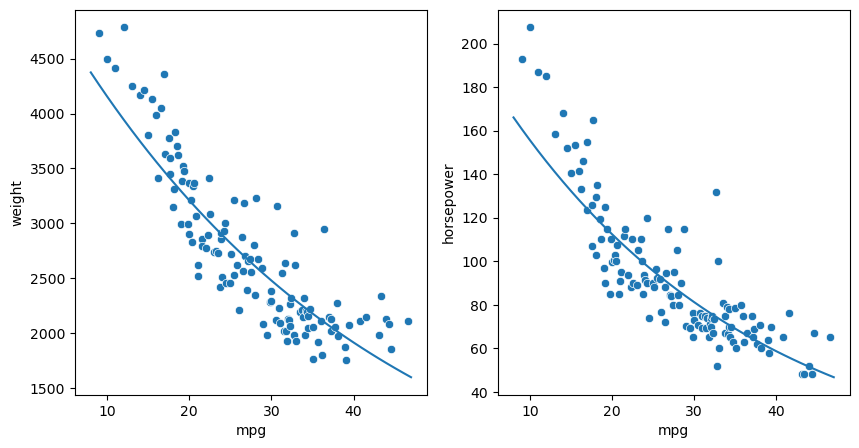

In [142]:


X1_exp = np.arange(df_mpg_exp['mpg=X'].min()-1,df_mpg_exp['mpg=X'].max()+1,1)
x1_exp = X1_exp
y1_exp = solve1_exp[1]*np.exp(solve1_exp[0]*x1_exp)


X2_exp = np.arange(df_mpg_exp['mpg=X'].min()-1,df_mpg_exp['mpg=X'].max()+1,1)
x2_exp = X2_exp
y2_exp = solve2_exp[1]*np.exp(solve2_exp[0]*x2_exp)

print(f"Aproximacion Exponencial Weight:\ty = {solve1_exp[1].round(3)}*exp^({solve1_exp[0].round(6)}X)")
print(f"Aproximacion Exponencial Horse Power:\ty = {solve2_exp[1].round(3)}*exp^({solve2_exp[0].round(6)}X)")

fig,axes = plt.subplots(1,2,figsize=(20,10))
sns.scatterplot(ax=axes[0],data=df_mpg,x='mpg',y='weight')
sns.lineplot(ax=axes[0],x=x1_exp,y=y1_exp)
sns.scatterplot(ax=axes[1],data=df_mpg,x='mpg',y='horsepower')
sns.lineplot(ax=axes[1],x=x2_exp,y=y2_exp)
plt.show()

In [137]:
df_mpg_exp.loc[:,'y1_predict'] = solve1_exp[1]*np.exp(solve1_exp[0]*df_mpg_exp['mpg=X'])
df_mpg_exp.loc[:,'y2_predict'] = solve2_exp[1]*np.exp(solve2_exp[0]*df_mpg_exp['mpg=X'])
df_mpg_exp.head()

,mpg=X,y1(W),y2(HP),Y1(W),Y2(HP),X2,X*Y1(W),X*Y2(HP),y1_predict,y2_predict
0,9.0,4732.00,193.00,8.462103,5.262690,81.0,76.158929,47.364212,4263.098478,160.751152
1,10.0,4495.50,207.50,8.410832,5.335131,100.0,84.108322,53.351313,4154.320111,155.608206
2,11.0,4419.00,187.00,8.393669,5.231109,121.0,92.330356,57.542195,4048.317362,150.629799
3,12.0,4786.50,185.00,8.473555,5.220356,144.0,101.682657,62.644270,3945.019407,145.810668
4,13.0,4254.45,158.35,8.355721,5.064808,169.0,108.624370,65.842501,3844.357231,141.145715


## Calculamos Error de la hiperbola de Mínimos cuadrados

>La función de error será: $E(a,b)= \sum_{}^{} d_i^2 = \sum_{}^{} [(b*e^{(ax)})- f(x_i)]^2 $

>Siendo 'Y1_predict' $= (b_1*e^{(a_1x)})$ las nuevas imagenes de la relación 'mpg' vs. 'weight'

>Siendo 'Y2_predict' $= (b_2*e^{(a_2x)})$ las nuevas imagenes de la relación 'mpg' vs. 'horsepower'

In [140]:
weight_error_exp = np.power(df_mpg_exp['y1_predict']-df_mpg_exp['y1(W)'],2).sum()
horsepower_error_exp = np.power(df_mpg_exp['y2_predict']-df_mpg_exp['y2(HP)'],2).sum()
print(f"Weight Exponencial error:\t{weight_error_exp.round(2)}")
print(f"Horse Power Exponencial error:\t{horsepower_error_exp.round(2)}")

Weight Exponencial error:	13123971.47
Horse Power Exponencial error:	29995.59


# **Tercera Parte: Conclusión** 
> Es momento de decidir cuál es la mejor aproximación. Para eso veremos qué aproximación tuvo la menor cantidad de errores y graficaremos todas ellas.

In [149]:
df_error = pd.DataFrame({'weight error':[weight_error_lineal,weight_error_hip,weight_error_exp],
                         'horsepower error':[horsepower_error_lineal,horsepower_error_hip,horsepower_error_exp]},
                        index=['Aprox. Lineal','Aprox. Hiperbola','Aprox. Exponencial'])
df_error.round(2)

,weight error,horsepower error
Aprox. Lineal,16476367.35,38253.36
Aprox. Hiperbola,20605315.77,23109.99
Aprox. Exponencial,13123971.47,29995.59


>Conclusión final de los errores obtenidos.

>Buscamos en que aproximación hubo menor error.

In [176]:
print("Mpg vs Weight")
print(f"El error mas chico fue {df_error['weight error'].round(2).min()} de Aprox. Exponencial\n")

print("Mpg vs Horsepower")
print(f"El error mas chico fue {df_error['horsepower error'].round(2).min()} de Aprox. Hiperbola ")

Mpg vs Weight
El error mas chico fue 13123971.47 de Aprox. Exponencial

Mpg vs Horsepower
El error mas chico fue 23109.99 de Aprox. Hiperbola 


Aproximacion Lineal Weight:		Y = -74.02X + 4761.76
Aproximacion Lineal Horse Power:	Y = -3.2X + 180.68

Aproximacion Hiperbolica Weight:	y = 137584.09/ (x + 26.84)
Aproximacion Hiperbolica Horse Power:	y = 2793.61/ (x + 5.67)

Aproximacion Exponencial Weight:	y = 5379.65*exp^(-0.025847X)
Aproximacion Exponencial Horse Power:	y = 215.401*exp^(-0.032516X)



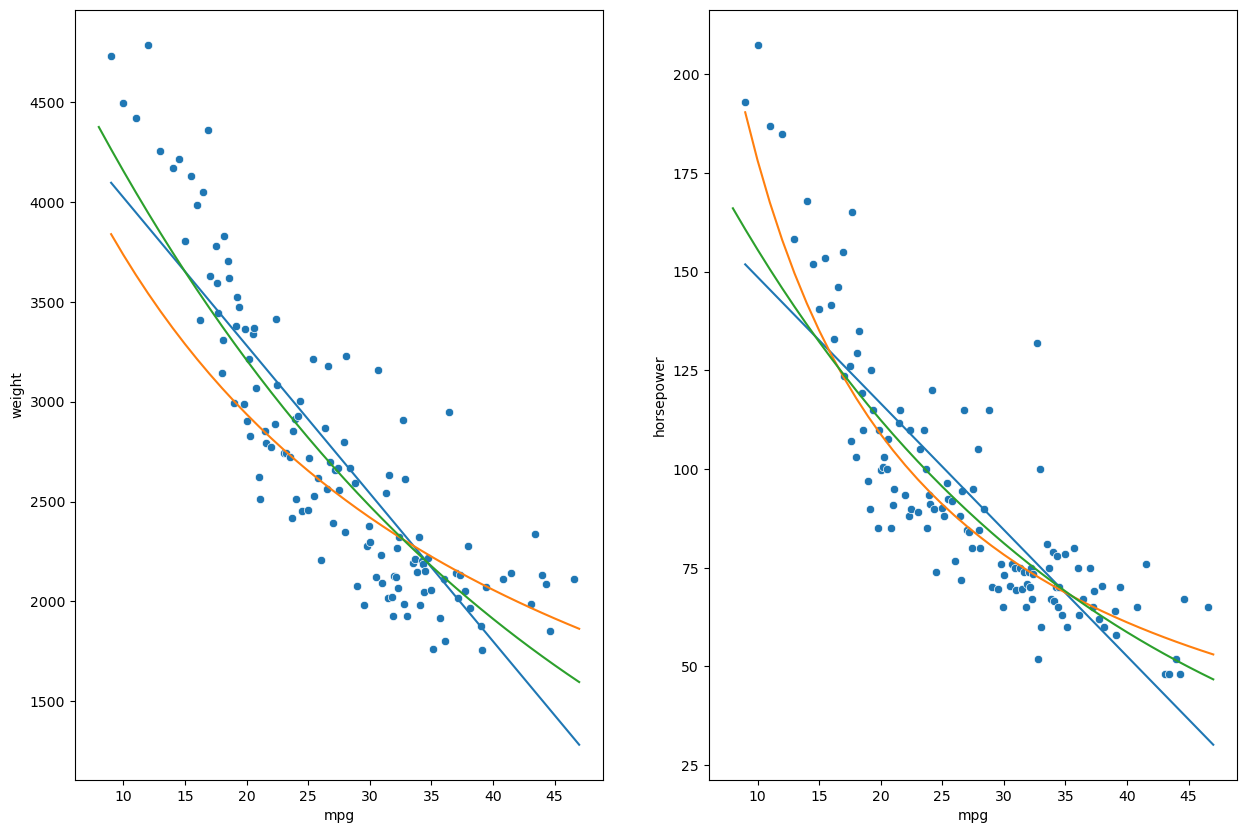

In [171]:
print(f"Aproximacion Lineal Weight:\t\tY = {solve1[0].round(2)}X + {solve1[1].round(2)}")
print(f"Aproximacion Lineal Horse Power:\tY = {solve2[0].round(2)}X + {solve2[1].round(2)}\n")
print(f"Aproximacion Hiperbolica Weight:\ty = {solve1_hip[0].round(2)}/ (x + {solve1_hip[1].round(2)})")
print(f"Aproximacion Hiperbolica Horse Power:\ty = {solve2_hip[0].round(2)}/ (x + {solve2_hip[1].round(2)})\n")
print(f"Aproximacion Exponencial Weight:\ty = {solve1_exp[1].round(3)}*exp^({solve1_exp[0].round(6)}X)")
print(f"Aproximacion Exponencial Horse Power:\ty = {solve2_exp[1].round(3)}*exp^({solve2_exp[0].round(6)}X)\n")


fig,axes = plt.subplots(1,2,figsize=(15,15))

sns.scatterplot(ax=axes[0],data=df_mpg,x='mpg',y='weight')
sns.lineplot(ax=axes[0],x=x1,y=y1)
sns.lineplot(ax=axes[0],x=x1_hip,y=y1_hip)
sns.lineplot(ax=axes[0],x=x1_exp,y=y1_exp)

sns.scatterplot(ax=axes[1],data=df_mpg,x='mpg',y='horsepower')
sns.lineplot(ax=axes[1],x=x2,y=y2)
sns.lineplot(ax=axes[1],x=x2_hip,y=y2_hip)
sns.lineplot(ax=axes[1],x=x2_exp,y=y2_exp)

plt.show()

>Como resultado final, nos quedamos con las siguientes aproximaciones y sus respectivos gráficos.

Aproximacion Exponencial Weight:	y = 5379.65*exp^(-0.025847X)
Aproximacion Hiperbolica Horse Power:	y = 2793.61/ (x + 5.67)



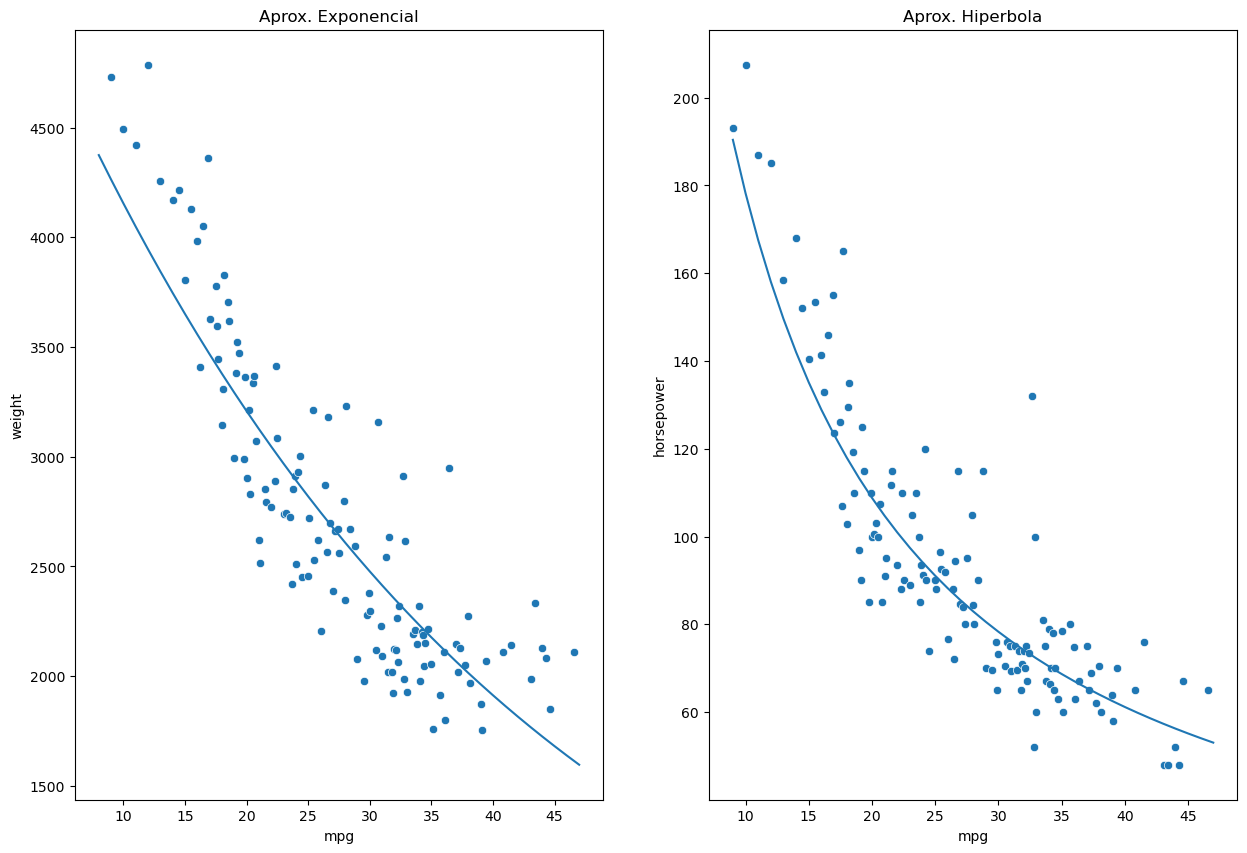

Mpg vs Weight
El error	13123971.47 libras

Mpg vs Horsepower
El error	23109.99 HP 


In [189]:
print(f"Aproximacion Exponencial Weight:\ty = {solve1_exp[1].round(3)}*exp^({solve1_exp[0].round(6)}X)")
print(f"Aproximacion Hiperbolica Horse Power:\ty = {solve2_hip[0].round(2)}/ (x + {solve2_hip[1].round(2)})\n")



fig,axes = plt.subplots(1,2,figsize=(15,15))

sns.scatterplot(ax=axes[0],data=df_mpg,x='mpg',y='weight')
sns.lineplot(ax=axes[0],x=x1_exp,y=y1_exp)
axes[0].set_title("Aprox. Exponencial")

sns.scatterplot(ax=axes[1],data=df_mpg,x='mpg',y='horsepower')
sns.lineplot(ax=axes[1],x=x2_hip,y=y2_hip)
axes[1].set_title("Aprox. Hiperbola")
plt.show()

print("Mpg vs Weight")
print(f"El error\t{df_error['weight error'].round(2).min()} libras\n")

print("Mpg vs Horsepower")
print(f"El error\t{df_error['horsepower error'].round(2).min()} HP ")

## Comentarios:
> Si bien quedó claro cuáles son los mejores modelos de aproximación para cada caso, pienso que los resultados están un poco alejados de la simple interpretación. Esa razón es suficiente para seguir avanzando.

>La idea es proporcionar una métrica fácil de interpretar en la escala de los datos originales. Para eso mismo haremos el cálculo de la Raíz del error cuadrático medio (o Root Mean Squared Error, RMSE) que es una métrica bien conocida en el cálculo estadístico utilizada para medir la precisión de un modelo de predicción. Proporciona una medida de la magnitud promedio de los errores de predicción, en las mismas unidades que los valores originales.

 Su formula es:

$$ RMSE = \sqrt{\frac{1}{n}*\sum_{i=1}^{n}(y_i-yhat_i)^2}$$

 donde

- $y_i$ son los valores reales.
- $yhat_i$ son los nuevos valores que obtenemos en cada aproximación.
- $n$ es el número de observaciones. 

De nuestros calculos sabemos que:

$$\sum_{}^{} d_i^2 = \sum_{i=1}^{n}(y_i-yhat_i)^2$$

Justamente es el error que presentamos en la conclusión final, por lo tanto, si a este valor lo dividimos por el número total de observaciones $n$ y hacemos la raíz cuadrada, obtenemos el RMSE.

> El otro problema que tenemos es la unidad de libras, no es común presentarlo de esta forma asi que lo representaremos en Kilogramos con la equivalencia:
$$1 libra = 0.4536 Kg $$

>Apliquemos lo mencionado.


In [192]:
df_RMSE=np.sqrt(df_error/df_mpg.shape[0])
df_RMSE['weight error Kg'] = df_RMSE['weight error']*0.4536
df_RMSE

,weight error,horsepower error,weight error Kg
Aprox. Lineal,360.187695,17.355331,163.381139
Aprox. Hiperbola,402.798437,13.489567,182.709371
Aprox. Exponencial,321.462841,15.368336,145.815545


> Con el último cuadro y los modelos elegidos como finales, podemos ver que para el caso del peso(weight) tendremos un error aproximado de 145 kg en nuestra predicción del peso del auto, basándonos en la eficiencia del combustible (en millas por galón). En el caso de los HP tendremos un error de 13.5 HP en nuestra predicción, basándonos en la eficiencia del combustible (en millas por galón).  